# CREDIT CARD FRAUD DETECTION

# Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score, classification_report,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,f_regression

# Load and Prepare Data

In [11]:
train = pd.read_csv("fraudTrain.csv")
test = pd.read_csv("fraudTest.csv")

In [12]:
df = pd.concat([train,test])

In [13]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [14]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [16]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Text(0, 0.5, 'Count')

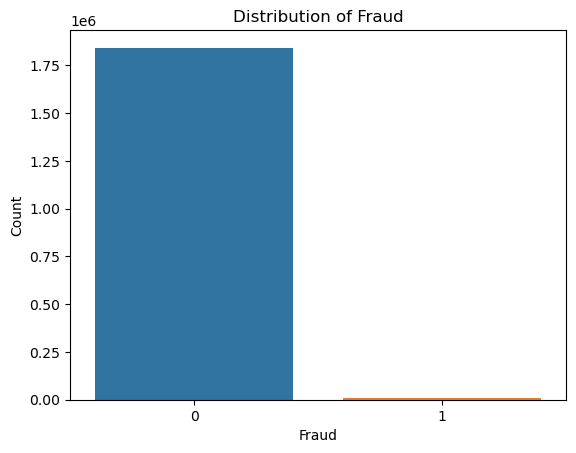

In [18]:
fraud_counts = df['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index,y=fraud_counts.values)
plt.title("Distribution of Fraud")
plt.xlabel("Fraud")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

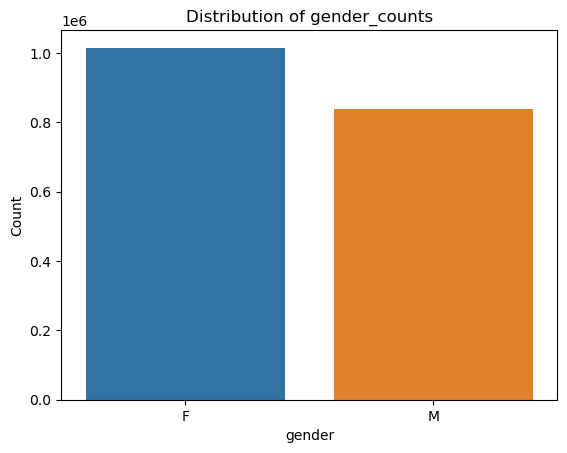

In [19]:
gender_counts = df['gender'].value_counts()
sns.barplot(x=gender_counts.index,y=gender_counts.values)
plt.title("Distribution of gender_counts")
plt.xlabel("gender")
plt.ylabel("Count")

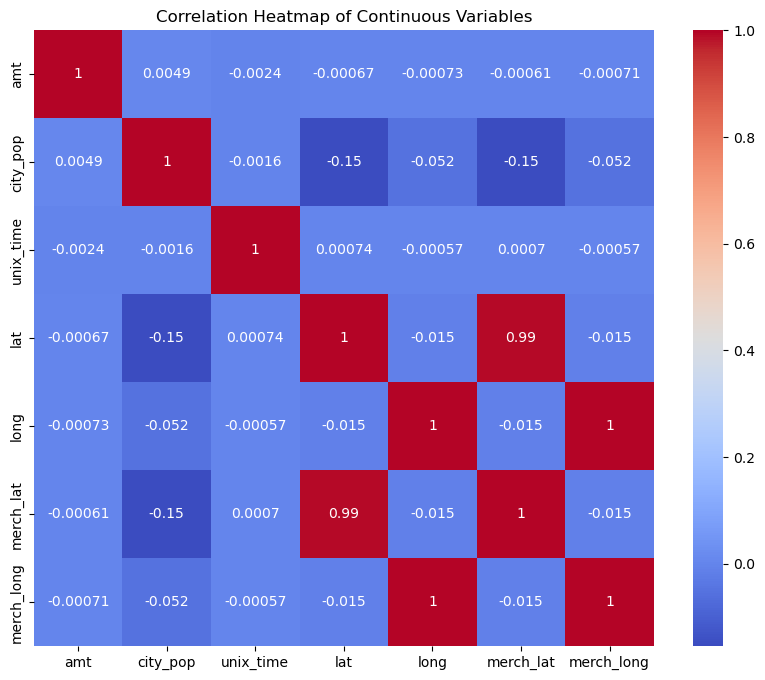

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['amt', 'city_pop', 'unix_time', 'lat', 'long', 'merch_lat', 'merch_long']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()
           

# Data Processing

In [22]:
fraud=df[df["is_fraud"]==1]
not_fraud=df[df["is_fraud"]==0]
print(fraud.shape[0])
print(not_fraud.shape[0])

9651
1842743


In [23]:
not_fraud = not_fraud.sample(fraud.shape[0])

In [24]:
data = pd.concat([fraud,not_fraud])

In [25]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1


# Visualizing the Distribution of Fraud in the Dataset

Text(0, 0.5, 'Count')

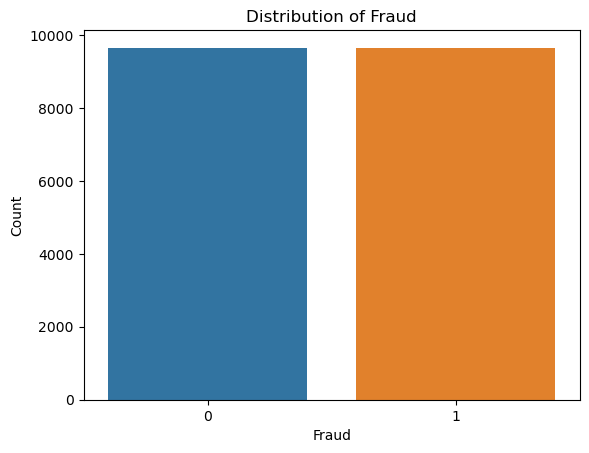

In [26]:
fraud_count = data['is_fraud'].value_counts()
sns.barplot(x=fraud_count.index,y=fraud_count.values)
plt.title("Distribution of Fraud")
plt.xlabel("Fraud")
plt.ylabel("Count")

# Feature Engineering

In [28]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [29]:
unwanted_columns = ['Unnamed: 0','trans_date_trans_time','cc_num',"merchant","category","first","last","gender","street","city","state","job","dob","trans_num"]
data.drop(columns=unwanted_columns,inplace=True)

In [30]:
data.head()

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
2449,281.06,28611,35.9946,-81.7266,885,1325466397,36.430124,-81.179483,1
2472,11.52,78208,29.4400,-98.4590,1595797,1325468849,29.819364,-99.142791,1
2523,276.31,78208,29.4400,-98.4590,1595797,1325473523,29.273085,-98.836360,1
2546,7.03,28611,35.9946,-81.7266,885,1325475483,35.909292,-82.091010,1
2553,275.73,78208,29.4400,-98.4590,1595797,1325476547,29.786426,-98.683410,1


# Split the Data

In [32]:
x = data.drop('is_fraud',axis=1)
y = data['is_fraud']

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [82]:
selector = SelectKBest(score_func=f_regression, k=5)
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)

In [84]:
selected_columns = x.columns[selector.get_support(indices=True)]
print("Selected features:", selected_columns)

Selected features: Index(['amt', 'zip', 'lat', 'unix_time', 'merch_lat'], dtype='object')


# Feature Scaling

In [88]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Training and Predicting with Logistic Regression Model

In [100]:
lg_model = LogisticRegression()
lg_model.fit(x_train,y_train)
y_pred = lg_model.predict(x_test)

In [102]:
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('Confusion matrix:',confusion_matrix(y_test, y_pred))

Accuracy: 0.855995855995856
Precision: 0.945489941596366
Recall: 0.7553136340072576
F1 score: 0.8397694524495678
Confusion matrix: [[1848   84]
 [ 472 1457]]


# Training a Decision Tree Classifier with Gini Index

In [39]:
tree_model = DecisionTreeClassifier(criterion = "gini")
tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
y_predicted = tree_model.predict(x_test)
print('Accuracy:',accuracy_score(y_test, y_predicted))
print('Precision:',precision_score(y_test, y_predicted))
print('Recall:', recall_score(y_test, y_predicted))
print('F1 score:',f1_score(y_test, y_predicted))
print('Confusion matrix:',confusion_matrix(y_test, y_predicted))

Accuracy: 0.8642838642838643
Precision: 0.8608115048793015
Recall: 0.8688439606013478
F1 score: 0.8648090815273477
Confusion matrix: [[1661  271]
 [ 253 1676]]


# Training a Random Forest Classifier Model

In [41]:
rb_model = RandomForestClassifier()
rb_model.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
y_predicted = rb_model.predict(x_test)
print('Accuracy:',accuracy_score(y_test, y_predicted))
print('Precision:',precision_score(y_test, y_predicted))
print('Recall:', recall_score(y_test, y_predicted))
print('F1 score:',f1_score(y_test, y_predicted))
print('Confusion matrix:',confusion_matrix(y_test, y_predicted))

Accuracy: 0.9116809116809117
Precision: 0.922790202342918
Recall: 0.8983929497148782
F1 score: 0.910428158655109
Confusion matrix: [[1787  145]
 [ 196 1733]]


# Selecting the Best Model Based on Accuracy and F1 Score

In [43]:
models = {
    LogisticRegression():"LogisticRegression",
    DecisionTreeClassifier():"DecisionTreeClassifier",
    RandomForestClassifier():"RandomForestClassifier"
    
}

In [44]:
def best_models(model):
    best_accuracy = 0
    best_f1_score = 0
    best_model = ""

    for i,j in model.items():
        i.fit(x_train,y_train)
        x = i.predict(x_test)
        acc = accuracy_score(y_test,x)
        F1_score = f1_score(y_test,x)
        
        if acc > best_accuracy and F1_score > best_f1_score:
            best_accuracy = acc
            best_f1_score = F1_score
            best_model = j
    return best_accuracy,best_f1_score,best_model

best_accuracy, best_f1_score, best_model = best_models(models)

print(f"Best Model: {best_model}")
print(f"WithBest Accuracy: {best_accuracy}")
print(f"With Best F1 Score: {best_f1_score}")

Best Model: RandomForestClassifier
WithBest Accuracy: 0.9103859103859104
With Best F1 Score: 0.9087552742616033
